**Imports**

In [1]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
import torch.utils.data
from torch.utils.data import DataLoader

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from torchsummary import summary
from typing import Optional

**Configurations & Transformations**

In [71]:
# Paths
cifar10_path = '/data/CIFAR-10'
cifar100_path = '/data/CIFAR-100'

# Configs
configs = {
    "batch_size": 10,
    "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
}

# Transformations
transform = transforms.Compose(
    [
        #transforms.ToPILImage(),
        transforms.Resize(32),
        transforms.ToTensor(),
        #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
     ])

**Datasets**

In [72]:
# CIFAR-10
cifar10_trainset = datasets.CIFAR10(root=cifar10_path, train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root=cifar10_path, train=False, download=True, transform=transform)

cifar10_trainset, cifar10_testset

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: /data/CIFAR-10
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: /data/CIFAR-10
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [73]:
# CIFAR-100
cifar100_trainset = datasets.CIFAR100(root=cifar100_path, train=True, download=True, transform=transform)
cifar100_testset = datasets.CIFAR100(root=cifar100_path, train=False, download=True, transform=transform)

cifar100_trainset, cifar100_testset

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR100
     Number of datapoints: 50000
     Root location: /data/CIFAR-100
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset CIFAR100
     Number of datapoints: 10000
     Root location: /data/CIFAR-100
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=32, interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [74]:
# CIFAR-10 Classes
class_names_10 = ['air plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'toraku']

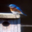

In [23]:
display(cifar10_trainset[13][0])

In [29]:
np.asarray(cifar10_trainset[13][0]).shape

# height = width = 32 | channels = 3 -> RGB

(32, 32, 3)

**Dataloaders**

In [75]:
# CIFAR-10
cifar10_trainloader = DataLoader(cifar10_trainset, batch_size=configs['batch_size'], shuffle=True)
cifar10_testloader = DataLoader(cifar10_testset, batch_size=configs['batch_size'], shuffle=False)

In [76]:
# CIFAR-100
cifar100_trainloader = DataLoader(cifar100_trainset, batch_size=configs['batch_size'], shuffle=True)
cifar100_testloader = DataLoader(cifar100_testset, batch_size=configs['batch_size'], shuffle=False)

In [77]:
images, labels = next(iter(cifar10_trainloader))
print(f'images shape: {images.shape}')
print(f'labels shape: {labels.shape}')

images shape: torch.Size([10, 3, 32, 32])
labels shape: torch.Size([10])


**CIFAR-10 Preview Photos**

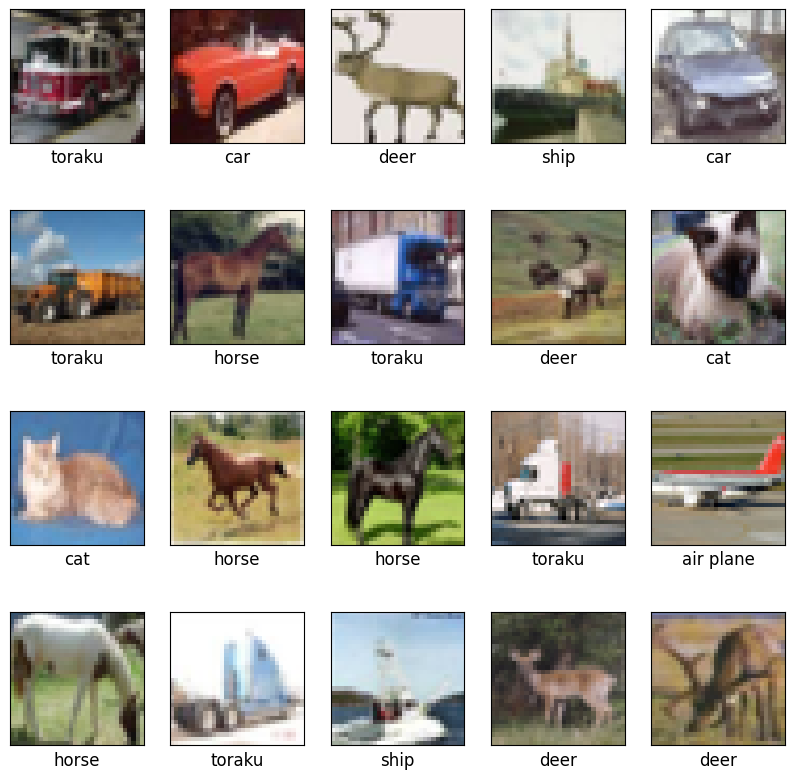

In [80]:
# get some random training images from CIFAR-10
plt.figure(figsize=(10, 10))
counter = 0
for images, labels in cifar10_trainloader:
    for i, img in enumerate(images):
        plt.subplot(4, 5, counter+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #img = img/2 + 0.5   ###unnormalize

        # converting (C,H,W) -> (H,W,C)
        img_show = np.transpose(img, (1, 2, 0))
        plt.imshow(img_show, cmap=plt.cm.binary)
        plt.xlabel(class_names_10[int(labels[i])], color='black', fontsize='large')
        counter += 1
        if counter == 20:
            break
    if counter == 20:
        break

plt.show()

**CIFAR-100 Preview Photos**

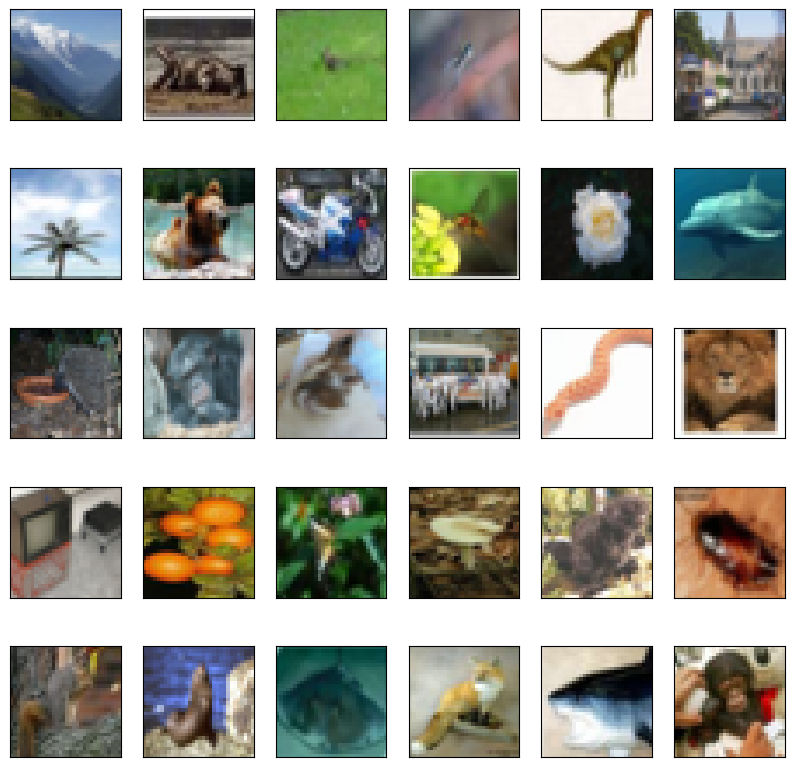

In [81]:
# get some random training images from CIFAR-100
plt.figure(figsize=(10, 10))
counter = 0
for images, labels in cifar100_trainloader:
    for i, img in enumerate(images):
        plt.subplot(5, 6, counter+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #img = img/2 + 0.5   ###unnormalize

        # converting (C,H,W) -> (H,W,C)
        img_show = np.transpose(img, (1, 2, 0))
        plt.imshow(img_show, cmap=plt.cm.binary)
        counter += 1
        if counter == 30:
            break
    if counter == 30:
        break

plt.show()